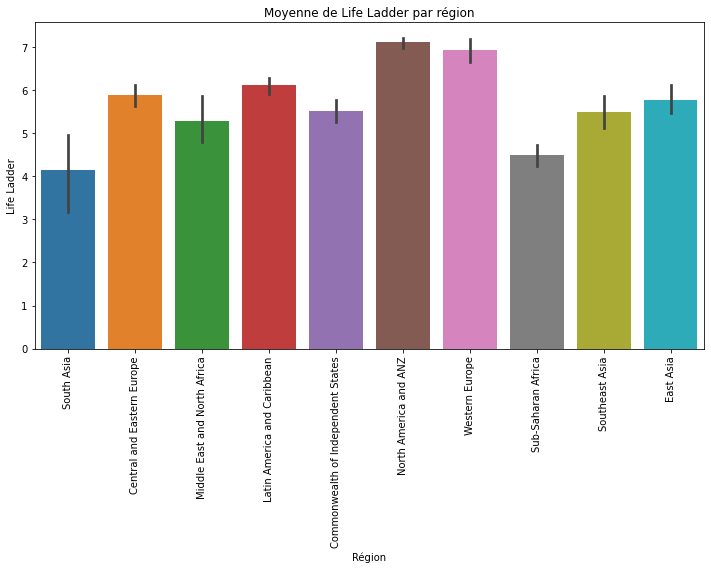

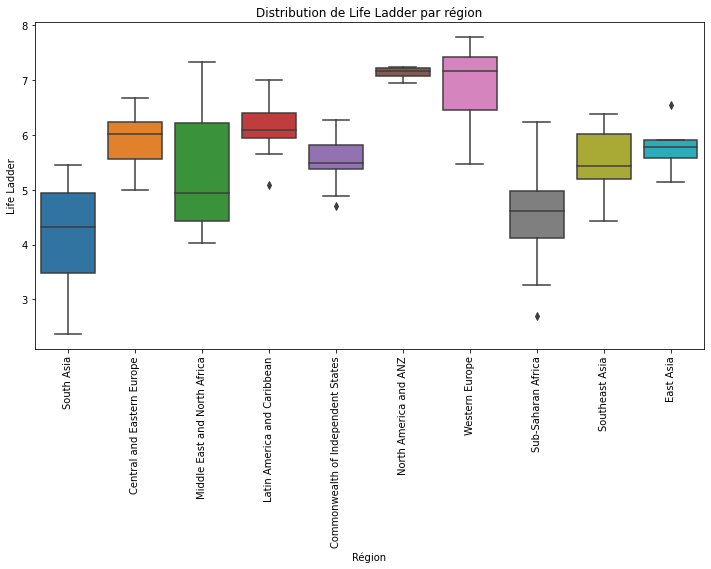

/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

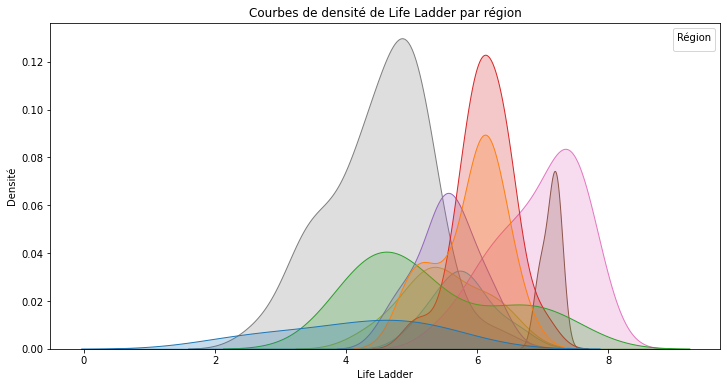

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

whr_df = pd.read_csv("WHR-2019.csv")

# Diagramme en barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Regional indicator', y='Life Ladder', data=whr_df)
plt.xticks(rotation=90)
plt.title('Moyenne de Life Ladder par région')
plt.xlabel('Région')
plt.ylabel('Life Ladder')
plt.show()

# Boîtes à moustaches
plt.figure(figsize=(12, 6))
sns.boxplot(x='Regional indicator', y='Life Ladder', data=whr_df)
plt.xticks(rotation=90)
plt.title('Distribution de Life Ladder par région')
plt.xlabel('Région')
plt.ylabel('Life Ladder')
plt.show()

# Courbes de densité
plt.figure(figsize=(12, 6))
sns.kdeplot(data=whr_df, x='Life Ladder', hue='Regional indicator', fill=True)
plt.title('Courbes de densité de Life Ladder par région')
plt.xlabel('Life Ladder')
plt.ylabel('Densité')
plt.legend(title='Région')
plt.show()

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Supprimer les lignes avec des valeurs manquantes
whr_df.dropna(inplace=True)
data = whr_df.rename(columns={"Life Ladder" :"Life_Ladder"}) # make name pythonic
data = data.rename(columns={"Regional indicator" :"Regional_indicator"}) # make name pythonic
#l'ANOVA
model = ols('Life_Ladder ~ C(Regional_indicator)', data=data).fit()
anova_table = sm.stats.anova_lm(model)

# Afficher la table ANOVA
print(anova_table)

                          df      sum_sq    mean_sq          F        PR(>F)
C(Regional_indicator)    9.0  109.720111  12.191123  28.286279  2.232284e-25
Residual               116.0   49.994922   0.430991        NaN           NaN


In [5]:
from scipy.stats import ttest_ind

#liste pour stocker les résultats des tests t
ttest_list = []

# les modalités de la variable "Regional indicator"
categories = whr_df['Regional indicator'].unique()

# Boucle à travers chaque paire de catégories et effectuez un test t
for i in range(len(categories)):
    for j in range(i+1, len(categories)):
        #les échantillons correspondant à chaque paire de catégories
        ech1 = whr_df[whr_df['Regional indicator'] == categories[i]]['Life Ladder']
        ech2 = whr_df[whr_df['Regional indicator'] == categories[j]]['Life Ladder']
        
        #le test t pour comparer les moyennes des échantillons
        t_statistic, p_value = ttest_ind(ech1, ech2)
        
        # Ajoutez les résultats du test t à la liste
        ttest_list.append((categories[i], categories[j], t_statistic, p_value))

for result in ttest_list:
    print(f"Comparaison entre {result[0]} et {result[1]}:")
    print(f"   - Statistique t : {result[2]}")
    print(f"   - Valeur p : {result[3]}")


Comparaison entre South Asia et Central and Eastern Europe:
   - Statistique t : -4.813827571964888
   - Valeur p : 0.00012065533980948834
Comparaison entre South Asia et Middle East and North Africa:
   - Statistique t : -1.5422588657588066
   - Valeur p : 0.15127274013197003
Comparaison entre South Asia et Latin America and Caribbean:
   - Statistique t : -6.881991242965808
   - Valeur p : 6.529853504250809e-07
Comparaison entre South Asia et Commonwealth of Independent States:
   - Statistique t : -3.384035797628272
   - Valeur p : 0.004452054884969147
Comparaison entre South Asia et North America and ANZ:
   - Statistique t : -5.041570488873613
   - Valeur p : 0.0009996705085902606
Comparaison entre South Asia et Western Europe:
   - Statistique t : -8.231553707699224
   - Valeur p : 2.6197642802456977e-08
Comparaison entre South Asia et Sub-Saharan Africa:
   - Statistique t : -0.9959052808576611
   - Valeur p : 0.3254354195284842
Comparaison entre South Asia et Southeast Asia:
  

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Effectuer le test de Tukey avec correction Bonferroni
tukey_results = pairwise_tukeyhsd(whr_df['Life Ladder'], whr_df['Regional indicator'], alpha=0.05)

print(tukey_results)


                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                             
              group1                             group2               meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------------
        Central and Eastern Europe Commonwealth of Independent States   -0.306 0.9792 -1.1706  0.5587  False
        Central and Eastern Europe                          East Asia  -0.0579    1.0 -1.3974  1.2816  False
        Central and Eastern Europe        Latin America and Caribbean    0.326 0.9184 -0.4144  1.0665  False
        Central and Eastern Europe       Middle East and North Africa  -0.7527  0.277 -1.7222  0.2168  False
        Central and Eastern Europe              North America and ANZ   1.2738 0.0262   0.082  2.4657   True
        Central and Eastern Europe                         South Asia  -1.7087    0.0 -2.7318 -0.6856   True
        Central and